In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

12it [00:00, 112.46it/s]

25it [00:00, 115.36it/s]

39it [00:00, 119.54it/s]

52it [00:00, 121.91it/s]

62it [00:00, 108.91it/s]

73it [00:00, 108.33it/s]

86it [00:00, 112.29it/s]

99it [00:00, 116.62it/s]

113it [00:00, 120.75it/s]

127it [00:01, 124.37it/s]

140it [00:01, 125.45it/s]

153it [00:01, 109.09it/s]

165it [00:01, 101.53it/s]

177it [00:01, 106.05it/s]

191it [00:01, 112.52it/s]

205it [00:01, 117.45it/s]

218it [00:01, 120.84it/s]

231it [00:01, 122.80it/s]

245it [00:02, 124.79it/s]

258it [00:02, 125.65it/s]

271it [00:02, 126.54it/s]

285it [00:02, 127.81it/s]

298it [00:02, 127.95it/s]

312it [00:02, 128.84it/s]

326it [00:02, 129.53it/s]

339it [00:02, 129.18it/s]

353it [00:02, 129.64it/s]

366it [00:03, 122.47it/s]

380it [00:03, 125.78it/s]

393it [00:03, 123.70it/s]

406it [00:03, 122.12it/s]

420it [00:03, 125.29it/s]

433it [00:03, 126.27it/s]

446it [00:03, 127.21it/s]

460it [00:03, 129.75it/s]

474it [00:03, 130.36it/s]

488it [00:03, 130.02it/s]

502it [00:04, 124.61it/s]

515it [00:04, 121.82it/s]

528it [00:04, 109.16it/s]

540it [00:04, 111.67it/s]

553it [00:04, 114.66it/s]

566it [00:04, 118.75it/s]

580it [00:04, 122.06it/s]

593it [00:04, 119.61it/s]

606it [00:04, 121.91it/s]

619it [00:05, 122.46it/s]

632it [00:05, 122.71it/s]

645it [00:05, 120.55it/s]

658it [00:05, 121.66it/s]

671it [00:05, 123.49it/s]

684it [00:05, 122.77it/s]

697it [00:05, 123.88it/s]

710it [00:05, 124.65it/s]

723it [00:05, 124.90it/s]

736it [00:06, 124.96it/s]

750it [00:06, 127.11it/s]

764it [00:06, 128.37it/s]

777it [00:06, 126.81it/s]

790it [00:06, 127.34it/s]

804it [00:06, 128.87it/s]

817it [00:06, 123.44it/s]

831it [00:06, 126.09it/s]

844it [00:06, 115.01it/s]

858it [00:07, 119.51it/s]

871it [00:07, 107.20it/s]

883it [00:07, 109.88it/s]

896it [00:07, 110.75it/s]

908it [00:07, 101.22it/s]

919it [00:07, 93.91it/s] 

929it [00:07, 92.47it/s]

939it [00:07, 91.46it/s]

949it [00:08, 90.52it/s]

962it [00:08, 99.41it/s]

976it [00:08, 107.82it/s]

989it [00:08, 113.46it/s]

1003it [00:08, 118.49it/s]

1017it [00:08, 122.97it/s]

1030it [00:08, 121.83it/s]

1044it [00:08, 124.97it/s]

1057it [00:08, 126.07it/s]

1071it [00:08, 127.45it/s]

1084it [00:09, 127.05it/s]

1097it [00:09, 123.09it/s]

1111it [00:09, 125.35it/s]

1125it [00:09, 127.50it/s]

1138it [00:09, 111.45it/s]

1150it [00:09, 103.15it/s]

1163it [00:09, 108.34it/s]

1176it [00:09, 113.71it/s]

1189it [00:09, 117.78it/s]

1202it [00:10, 120.53it/s]

1215it [00:10, 122.91it/s]

1228it [00:10, 123.43it/s]

1241it [00:10, 125.19it/s]

1254it [00:10, 126.56it/s]

1267it [00:10, 126.35it/s]

1280it [00:10, 126.68it/s]

1294it [00:10, 127.55it/s]

1307it [00:10, 127.85it/s]

1320it [00:10, 128.09it/s]

1333it [00:11, 128.05it/s]

1346it [00:11, 127.84it/s]

1359it [00:11, 128.08it/s]

1372it [00:11, 128.05it/s]

1385it [00:11, 110.18it/s]

1398it [00:11, 113.94it/s]

1411it [00:11, 116.76it/s]

1424it [00:11, 118.87it/s]

1437it [00:11, 121.66it/s]

1451it [00:12, 124.58it/s]

1465it [00:12, 127.33it/s]

1479it [00:12, 128.43it/s]

1493it [00:12, 129.82it/s]

1507it [00:12, 130.50it/s]

1521it [00:12, 131.68it/s]

1535it [00:12, 131.37it/s]

1549it [00:12, 131.28it/s]

1563it [00:12, 131.29it/s]

1577it [00:13, 120.19it/s]

1590it [00:13, 122.37it/s]

1603it [00:13, 124.35it/s]

1617it [00:13, 126.46it/s]

1631it [00:13, 128.34it/s]

1644it [00:13, 128.54it/s]

1658it [00:13, 129.68it/s]

1672it [00:13, 129.41it/s]

1685it [00:13, 102.86it/s]

1697it [00:14, 105.66it/s]

1709it [00:14, 98.83it/s] 

1723it [00:14, 106.66it/s]

1737it [00:14, 113.26it/s]

1750it [00:14, 116.52it/s]

1763it [00:14, 117.75it/s]

1776it [00:14, 106.74it/s]

1788it [00:14, 99.97it/s] 

1799it [00:15, 96.72it/s]

1809it [00:15, 93.15it/s]

1820it [00:15, 97.14it/s]

1834it [00:15, 105.91it/s]

1848it [00:15, 113.01it/s]

1862it [00:15, 118.81it/s]

1876it [00:15, 123.44it/s]

1890it [00:15, 126.44it/s]

1903it [00:15, 127.28it/s]

1917it [00:16, 128.34it/s]

1930it [00:16, 107.51it/s]

1942it [00:16, 110.54it/s]

1955it [00:16, 115.06it/s]

1967it [00:16, 110.38it/s]

1980it [00:16, 114.90it/s]

1994it [00:16, 119.55it/s]

2007it [00:16, 122.31it/s]

2020it [00:16, 103.97it/s]

2031it [00:17, 97.78it/s] 

2042it [00:17, 94.51it/s]

2052it [00:17, 91.71it/s]

2064it [00:17, 98.43it/s]

2077it [00:17, 105.39it/s]

2090it [00:17, 111.48it/s]

2103it [00:17, 115.38it/s]

2116it [00:17, 119.38it/s]

2129it [00:17, 110.90it/s]

2142it [00:18, 115.25it/s]

2156it [00:18, 120.07it/s]

2169it [00:18, 117.69it/s]

2183it [00:18, 122.39it/s]

2197it [00:18, 126.04it/s]

2211it [00:18, 128.33it/s]

2225it [00:18, 130.33it/s]

2239it [00:18, 131.34it/s]

2253it [00:18, 132.01it/s]

2267it [00:19, 132.48it/s]

2281it [00:19, 133.31it/s]

2295it [00:19, 129.54it/s]

2309it [00:19, 130.12it/s]

2323it [00:19, 127.35it/s]

2337it [00:19, 128.20it/s]

2350it [00:19, 116.47it/s]

2363it [00:19, 118.14it/s]

2376it [00:19, 119.26it/s]

2389it [00:20, 119.92it/s]

2403it [00:20, 123.48it/s]

2417it [00:20, 126.13it/s]

2431it [00:20, 128.76it/s]

2444it [00:20, 115.97it/s]

2456it [00:20, 113.07it/s]

2470it [00:20, 118.73it/s]

2483it [00:20, 118.89it/s]

2497it [00:20, 122.71it/s]

2511it [00:21, 126.29it/s]

2525it [00:21, 128.70it/s]

2539it [00:21, 129.30it/s]

2553it [00:21, 131.28it/s]

2567it [00:21, 125.38it/s]

2581it [00:21, 126.94it/s]

2595it [00:21, 128.28it/s]

2608it [00:21, 122.44it/s]

2622it [00:21, 124.97it/s]

2635it [00:22, 123.60it/s]

2648it [00:22, 125.30it/s]

2662it [00:22, 126.99it/s]

2675it [00:22, 127.49it/s]

2689it [00:22, 128.93it/s]

2702it [00:22, 129.11it/s]

2715it [00:22, 129.03it/s]

2728it [00:22, 128.24it/s]

2741it [00:22, 128.10it/s]

2755it [00:22, 129.52it/s]

2768it [00:23, 128.28it/s]

2782it [00:23, 129.62it/s]

2795it [00:23, 129.53it/s]

2808it [00:23, 129.07it/s]

2821it [00:23, 121.63it/s]

2834it [00:23, 122.69it/s]

2847it [00:23, 124.78it/s]

2860it [00:23, 125.30it/s]

2873it [00:23, 126.11it/s]

2886it [00:23, 126.85it/s]

2900it [00:24, 127.76it/s]

2913it [00:24, 127.13it/s]

2926it [00:24, 123.76it/s]

2939it [00:24, 120.00it/s]

2953it [00:24, 123.35it/s]

2967it [00:24, 125.93it/s]

2981it [00:24, 128.08it/s]

2995it [00:24, 128.78it/s]

3009it [00:24, 129.18it/s]

3022it [00:25, 126.55it/s]

3036it [00:25, 128.06it/s]

3049it [00:25, 127.35it/s]

3063it [00:25, 128.59it/s]

3077it [00:25, 129.64it/s]

3091it [00:25, 130.18it/s]

3105it [00:25, 130.38it/s]

3119it [00:25, 130.60it/s]

3133it [00:25, 130.44it/s]

3147it [00:26, 125.85it/s]

3160it [00:26, 127.01it/s]

3174it [00:26, 128.96it/s]

3188it [00:26, 129.70it/s]

3202it [00:26, 130.32it/s]

3216it [00:26, 131.93it/s]

3230it [00:26, 132.57it/s]

3244it [00:26, 132.38it/s]

3258it [00:26, 134.10it/s]

3272it [00:26, 133.87it/s]

3286it [00:27, 133.78it/s]

3300it [00:27, 133.10it/s]

3314it [00:27, 131.46it/s]

3328it [00:27, 129.40it/s]

3341it [00:27, 129.52it/s]

3354it [00:27, 128.57it/s]

3367it [00:27, 124.90it/s]

3380it [00:27, 125.22it/s]

3394it [00:27, 126.92it/s]

3408it [00:28, 128.38it/s]

3421it [00:28, 128.28it/s]

3434it [00:28, 123.65it/s]

3447it [00:28, 122.23it/s]

3461it [00:28, 124.54it/s]

3475it [00:28, 126.78it/s]

3488it [00:28, 127.32it/s]

3502it [00:28, 128.90it/s]

3515it [00:28, 128.35it/s]

3529it [00:28, 129.70it/s]

3542it [00:29, 125.99it/s]

3555it [00:29, 112.24it/s]

3567it [00:29, 102.10it/s]

3578it [00:29, 97.48it/s] 

3591it [00:29, 103.77it/s]

3605it [00:29, 110.45it/s]

3619it [00:29, 116.17it/s]

3631it [00:29, 113.85it/s]

3644it [00:30, 117.91it/s]

3657it [00:30, 120.89it/s]

3670it [00:30, 121.21it/s]

3683it [00:30, 119.06it/s]

3696it [00:30, 121.88it/s]

3709it [00:30, 123.67it/s]

3723it [00:30, 125.32it/s]

3737it [00:30, 127.23it/s]

3751it [00:30, 128.13it/s]

3765it [00:30, 129.19it/s]

3769it [00:31, 121.47it/s]


0it [00:00, ?it/s]

13it [00:00, 122.42it/s]

Number of empty sat catalogs is 0


26it [00:00, 122.65it/s]

40it [00:00, 125.71it/s]

53it [00:00, 126.87it/s]

67it [00:00, 129.13it/s]

80it [00:00, 129.23it/s]

94it [00:00, 131.10it/s]

108it [00:00, 132.05it/s]

122it [00:00, 132.42it/s]

135it [00:01, 131.44it/s]

148it [00:01, 110.41it/s]

160it [00:01, 112.43it/s]

172it [00:01, 106.51it/s]

186it [00:01, 113.29it/s]

200it [00:01, 119.92it/s]

214it [00:01, 123.12it/s]

227it [00:01, 110.41it/s]

239it [00:02, 101.34it/s]

250it [00:02, 103.46it/s]

263it [00:02, 109.75it/s]

277it [00:02, 116.65it/s]

291it [00:02, 122.48it/s]

305it [00:02, 126.17it/s]

319it [00:02, 128.61it/s]

333it [00:02, 131.50it/s]

347it [00:02, 132.56it/s]

361it [00:02, 133.89it/s]

376it [00:03, 135.36it/s]

390it [00:03, 120.20it/s]

403it [00:03, 122.13it/s]

417it [00:03, 123.49it/s]

430it [00:03, 122.83it/s]

443it [00:03, 123.87it/s]

457it [00:03, 127.80it/s]

470it [00:03, 121.99it/s]

483it [00:03, 122.98it/s]

497it [00:04, 126.25it/s]

510it [00:04, 111.53it/s]

524it [00:04, 116.68it/s]

538it [00:04, 121.55it/s]

552it [00:04, 126.19it/s]

567it [00:04, 129.93it/s]

582it [00:04, 132.73it/s]

596it [00:04, 117.75it/s]

610it [00:04, 121.69it/s]

624it [00:05, 126.29it/s]

637it [00:05, 123.84it/s]

651it [00:05, 126.80it/s]

665it [00:05, 129.80it/s]

679it [00:05, 112.01it/s]

691it [00:05, 105.46it/s]

703it [00:05, 107.82it/s]

718it [00:05, 115.64it/s]

730it [00:06, 106.51it/s]

742it [00:06, 101.39it/s]

753it [00:06, 98.64it/s] 

764it [00:06, 96.42it/s]

778it [00:06, 105.10it/s]

792it [00:06, 112.95it/s]

806it [00:06, 118.43it/s]

819it [00:06, 103.90it/s]

830it [00:07, 99.79it/s] 

841it [00:07, 98.25it/s]

852it [00:07, 101.38it/s]

866it [00:07, 109.65it/s]

880it [00:07, 116.27it/s]

893it [00:07, 117.83it/s]

906it [00:07, 106.19it/s]

918it [00:07, 97.86it/s] 

931it [00:07, 103.96it/s]

944it [00:08, 109.97it/s]

956it [00:08, 105.13it/s]

969it [00:08, 110.55it/s]

981it [00:08, 103.78it/s]

994it [00:08, 110.06it/s]

1008it [00:08, 115.96it/s]

1022it [00:08, 122.10it/s]

1037it [00:08, 126.78it/s]

1051it [00:08, 130.39it/s]

1065it [00:09, 132.94it/s]

1080it [00:09, 135.01it/s]

1094it [00:09, 132.97it/s]

1108it [00:09, 134.27it/s]

1122it [00:09, 135.40it/s]

1136it [00:09, 135.79it/s]

1150it [00:09, 134.04it/s]

1164it [00:09, 133.39it/s]

1178it [00:09, 116.63it/s]

1192it [00:10, 121.30it/s]

1205it [00:10, 118.13it/s]

1218it [00:10, 104.10it/s]

1232it [00:10, 111.42it/s]

1244it [00:10, 85.94it/s] 

1257it [00:10, 94.63it/s]

1271it [00:10, 104.27it/s]

1285it [00:10, 112.33it/s]

1299it [00:11, 119.03it/s]

1314it [00:11, 124.72it/s]

1328it [00:11, 127.75it/s]

1342it [00:11, 130.85it/s]

1356it [00:11, 133.33it/s]

1371it [00:11, 135.24it/s]

1385it [00:11, 117.04it/s]

1399it [00:11, 122.48it/s]

1414it [00:11, 127.42it/s]

1428it [00:12, 130.51it/s]

1442it [00:12, 133.10it/s]

1456it [00:12, 134.38it/s]

1470it [00:12, 135.53it/s]

1484it [00:12, 113.67it/s]

1497it [00:12, 104.11it/s]

1509it [00:12, 102.28it/s]

1522it [00:12, 107.35it/s]

1534it [00:12, 99.11it/s] 

1545it [00:13, 91.50it/s]

1557it [00:13, 96.86it/s]

1570it [00:13, 104.62it/s]

1581it [00:13, 96.31it/s] 

1592it [00:13, 94.61it/s]

1602it [00:13, 91.44it/s]

1616it [00:13, 101.85it/s]

1630it [00:13, 110.91it/s]

1644it [00:14, 117.49it/s]

1658it [00:14, 122.54it/s]

1671it [00:14, 120.71it/s]

1684it [00:14, 101.26it/s]

1695it [00:14, 97.67it/s] 

1706it [00:14, 100.64it/s]

1721it [00:14, 109.97it/s]

1735it [00:14, 116.86it/s]

1749it [00:14, 122.83it/s]

1764it [00:15, 127.84it/s]

1778it [00:15, 130.82it/s]

1792it [00:15, 131.64it/s]

1806it [00:15, 130.40it/s]

1820it [00:15, 132.68it/s]

1834it [00:15, 131.72it/s]

1848it [00:15, 131.97it/s]

1862it [00:15, 131.05it/s]

1876it [00:15, 114.57it/s]

1890it [00:16, 119.14it/s]

1903it [00:16, 109.19it/s]

1917it [00:16, 116.85it/s]

1931it [00:16, 121.79it/s]

1944it [00:16, 122.28it/s]

1959it [00:16, 128.11it/s]

1974it [00:16, 131.81it/s]

1988it [00:16, 133.70it/s]

2003it [00:16, 135.78it/s]

2017it [00:17, 136.68it/s]

2031it [00:17, 136.60it/s]

2045it [00:17, 131.06it/s]

2060it [00:17, 133.82it/s]

2075it [00:17, 135.65it/s]

2089it [00:17, 124.98it/s]

2103it [00:17, 129.05it/s]

2118it [00:17, 132.55it/s]

2133it [00:17, 135.07it/s]

2147it [00:18, 135.71it/s]

2161it [00:18, 136.51it/s]

2176it [00:18, 137.64it/s]

2190it [00:18, 138.13it/s]

2204it [00:18, 133.40it/s]

2218it [00:18, 129.75it/s]

2232it [00:18, 131.95it/s]

2247it [00:18, 134.99it/s]

2261it [00:18, 129.67it/s]

2275it [00:19, 121.58it/s]

2290it [00:19, 127.25it/s]

2305it [00:19, 131.22it/s]

2320it [00:19, 134.41it/s]

2335it [00:19, 136.83it/s]

2349it [00:19, 133.28it/s]

2363it [00:19, 134.05it/s]

2377it [00:19, 132.50it/s]

2391it [00:19, 134.60it/s]

2405it [00:19, 134.97it/s]

2419it [00:20, 134.27it/s]

2433it [00:20, 134.27it/s]

2447it [00:20, 132.74it/s]

2461it [00:20, 131.92it/s]

2475it [00:20, 132.65it/s]

2489it [00:20, 133.38it/s]

2504it [00:20, 135.52it/s]

2518it [00:20, 136.54it/s]

2532it [00:20, 134.58it/s]

2546it [00:21, 133.25it/s]

2560it [00:21, 133.80it/s]

2574it [00:21, 135.28it/s]

2588it [00:21, 136.58it/s]

2603it [00:21, 138.27it/s]

2617it [00:21, 137.79it/s]

2631it [00:21, 113.91it/s]

2644it [00:21, 106.13it/s]

2656it [00:21, 95.35it/s] 

2670it [00:22, 104.47it/s]

2684it [00:22, 112.79it/s]

2698it [00:22, 119.70it/s]

2712it [00:22, 123.57it/s]

2726it [00:22, 128.08it/s]

2740it [00:22, 131.04it/s]

2754it [00:22, 132.87it/s]

2768it [00:22, 132.22it/s]

2782it [00:22, 129.72it/s]

2796it [00:23, 128.26it/s]

2809it [00:23, 126.60it/s]

2822it [00:23, 125.07it/s]

2835it [00:23, 124.49it/s]

2848it [00:23, 114.64it/s]

2860it [00:23, 113.58it/s]

2873it [00:23, 115.93it/s]

2887it [00:23, 121.97it/s]

2902it [00:23, 127.42it/s]

2916it [00:24, 130.31it/s]

2931it [00:24, 132.81it/s]

2945it [00:24, 133.36it/s]

2959it [00:24, 123.28it/s]

2973it [00:24, 125.85it/s]

2987it [00:24, 129.70it/s]

3001it [00:24, 117.04it/s]

3014it [00:24, 108.31it/s]

3026it [00:24, 109.76it/s]

3038it [00:25, 102.50it/s]

3049it [00:25, 97.31it/s] 

3061it [00:25, 101.60it/s]

3072it [00:25, 102.11it/s]

3087it [00:25, 111.24it/s]

3101it [00:25, 118.41it/s]

3115it [00:25, 124.10it/s]

3128it [00:25, 124.76it/s]

3142it [00:25, 126.94it/s]

3156it [00:26, 128.86it/s]

3170it [00:26, 122.87it/s]

3183it [00:26, 117.76it/s]

3198it [00:26, 123.87it/s]

3213it [00:26, 128.93it/s]

3227it [00:26, 132.06it/s]

3241it [00:26, 132.02it/s]

3256it [00:26, 134.49it/s]

3270it [00:26, 127.44it/s]

3283it [00:27, 126.89it/s]

3297it [00:27, 130.17it/s]

3311it [00:27, 122.15it/s]

3325it [00:27, 125.63it/s]

3340it [00:27, 130.09it/s]

3354it [00:27, 131.65it/s]

3368it [00:27, 130.92it/s]

3383it [00:27, 133.69it/s]

3398it [00:27, 136.15it/s]

3412it [00:28, 128.03it/s]

3426it [00:28, 130.72it/s]

3441it [00:28, 133.63it/s]

3456it [00:28, 136.40it/s]

3470it [00:28, 121.77it/s]

3484it [00:28, 124.57it/s]

3498it [00:28, 127.28it/s]

3512it [00:28, 130.74it/s]

3526it [00:28, 117.45it/s]

3541it [00:29, 124.69it/s]

3556it [00:29, 129.59it/s]

3571it [00:29, 132.60it/s]

3586it [00:29, 135.22it/s]

3601it [00:29, 137.44it/s]

3615it [00:29, 137.75it/s]

3629it [00:29, 137.33it/s]

3643it [00:29, 136.07it/s]

3657it [00:29, 128.80it/s]

3671it [00:30, 129.58it/s]

3685it [00:30, 129.54it/s]

3699it [00:30, 130.09it/s]

3713it [00:30, 109.89it/s]

3725it [00:30, 107.90it/s]

3739it [00:30, 115.44it/s]

3754it [00:30, 122.32it/s]

3768it [00:30, 126.89it/s]

3769it [00:30, 122.22it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

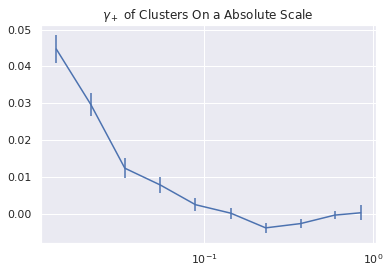

Aggregated xi:
[-30.389  -42.7478 -28.1227 -29.0679 -14.8435  -1.0472  56.6845  52.8952
   8.6161  -1.4385]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2941.2195  -5563.4936  -7726.6525 -10882.7125 -14893.7228 -19166.7722
 -21398.8837 -19225.5646 -10815.5284  -1090.8655]
------------------------------------------------------------------------------
Aggregated npairs:
[  680.  1444.  2280.  3750.  6147.  9883. 14620. 19480. 20833.  6592.]
------------------------------------------------------------------------------
Mean xi:
[-0.0447 -0.0296 -0.0123 -0.0078 -0.0024 -0.0001  0.0039  0.0027  0.0004
 -0.0002]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3253 -3.8528 -3.3889 -2.9021 -2.4229 -1.9394 -1.4637 -0.9869 -0.5192
 -0.1655]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

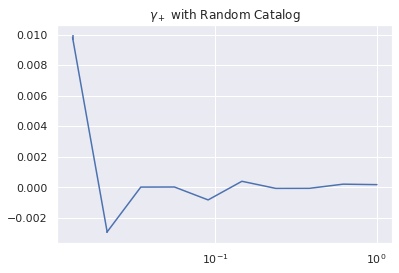

[ 9.8275e-03 -2.9159e-03  1.9740e-05  2.5301e-05 -8.2103e-04  3.9983e-04
 -6.5348e-05 -6.1656e-05  2.1127e-04  1.8010e-04]
[-1.6008e-04  4.7496e-05 -3.2153e-07 -4.1213e-07  1.3374e-05 -6.5127e-06
  1.0644e-06  1.0043e-06 -3.4413e-06 -2.9336e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

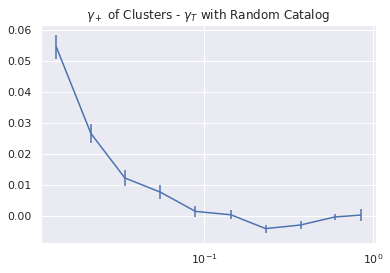

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

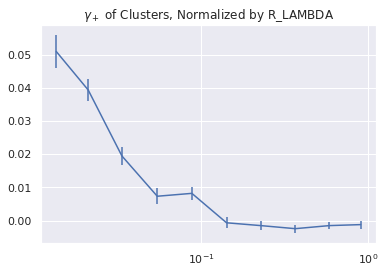

Aggregated xi:
[-19.1491 -39.3065 -36.8911 -21.4828 -39.2209   5.3848  18.7655  42.1478
  32.5249  20.738 ]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1611.8312  -3846.3817  -6414.5892  -8514.7546 -11613.3    -15219.4001
 -17901.5123 -17152.0412 -11249.4623  -1696.8627]
------------------------------------------------------------------------------
Aggregated npairs:
[  375.   997.  1890.  2930.  4781.  7802. 12131. 17094. 21121. 16691.]
------------------------------------------------------------------------------
Mean xi:
[-0.0511 -0.0394 -0.0195 -0.0073 -0.0082  0.0007  0.0015  0.0025  0.0015
  0.0012]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2982 -3.858  -3.394  -2.9061 -2.4291 -1.9507 -1.4757 -1.0034 -0.5326
 -0.1017]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)